In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x):
    return 3*x**2 - 4*x +5

In [4]:
f(3.0)

20.0

In [5]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)

In [6]:
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [7]:
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

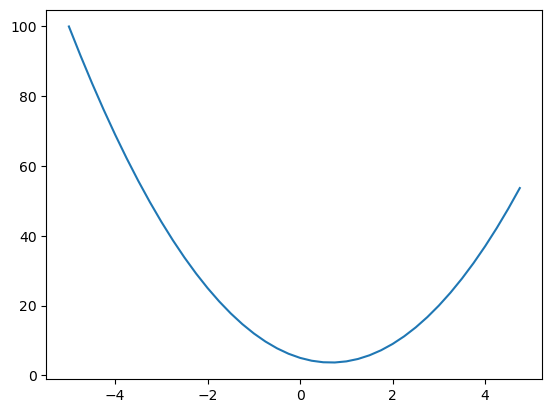

In [8]:
plt.plot(xs, ys)
plt.show()

In [10]:
h = 0.00000001
x = 3
(f(x + h) - f(x))/h

# f(x+h) => the final value (where we end up)
# f(x+h) - f(x) => how much the function changed (the vertical change, Δy or dy)
# (f(x+h) - f(x))/h => the slope (rate of change)

14.00000009255109

In [11]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [17]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print('d1', d1)
print('d2',d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [293]:
class Value:
    
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda : None
        self._prev = set(_children) #could have been simply self._prev = _childern(), but did this for better efficiency
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})" #,childern={self._prev}, op={(self._op)}
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad        
        out._backward = _backward
        
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
            
        return out
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')
        
        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad  # -> derivative of x^n is nx^n-1 & out.grad is chain rul 
        out._backward = _backward
        
        return out
        
    def __rmul__(self, other): # other * self
        return self * other
    
    def __truediv__(self, other): # self / other
        return self * other**-1
    
    def __neg__(self): # -self
        return self * -1
    
    def __sub__(self, other): # self - other
        return self + (-other)
    
    def __radd__(self, other): # other + self
        return self + other
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
            
        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
        
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
            
        return out
    
    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self) 
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()


# a = Value(2.0, label='a')
# b = Value(-3.0, label='b')
# c = Value(10.0, label='c')
# e = a*b; e.label = 'e'
# d = e + c; d.label = 'd'# same as (a.__mul__(b)).__add__(c)
# f = Value(-2.0, label='f')
# L = d * f; L.label = 'L'
# L

In [236]:
a = Value(1.0)

a + 1 # error because here 1 being Other in __add__ is not an instance of Value, so by adding 
      # other = other if isinstance(other, Value) else Value(other) - we can make it as an instance of Value 

AttributeError: 'int' object has no attribute 'data'

In [240]:
a = Value(1.0)

print(a + 1)
print(a *3)

Value(data=2.0,childern={Value(data=1,childern=set(), op=), Value(data=1.0,childern=set(), op=)}, op=+)
Value(data=3.0,childern={Value(data=3,childern=set(), op=), Value(data=1.0,childern=set(), op=)}, op=*)


In [245]:
a = Value(2.0)
# print(a * 3) # this works

# print(3 * a) # this does not work

# but by introducing __rmul__(), if __mul__ doesn't work it checks for reverese mul i.e (__rmul__)

print(3 * a)

Value(data=6.0,childern={Value(data=2.0,childern=set(), op=), Value(data=3,childern=set(), op=)}, op=*)


In [247]:
a = Value(2.0)
a.exp()

Value(data=7.38905609893065,childern={Value(data=2.0,childern=set(), op=)}, op=exp)

In [249]:
# Introducing division '/'

a = Value(2.0) #error because '/' is not introduced
b = Value(4.0)
a / b

# Division can be also written as: (This is how most of the math libs write division)
#     a / b
#     a * (1/b)
#     a * (b**-1) ; so, we need to add truediv and power in the Value class

TypeError: unsupported operand type(s) for /: 'Value' and 'Value'

In [253]:
a = Value(2.0)
b = Value(4.0)
a / b

Value(data=0.5,childern={Value(data=2.0,childern=set(), op=), Value(data=0.25,childern={Value(data=4.0,childern=set(), op=)}, op=**-1)}, op=*)

In [255]:
a = Value(2.0)
b = Value(4.0)
a - b

Value(data=-2.0,childern={Value(data=-4.0,childern={Value(data=-1,childern=set(), op=), Value(data=4.0,childern=set(), op=)}, op=*), Value(data=2.0,childern=set(), op=)}, op=+)

In [92]:
d._prev

{Value(data=-6.0,childern={Value(data=2.0,childern=set(), op=), Value(data=-3.0,childern=set(), op=)}, op=*),
 Value(data=10.0,childern=set(), op=)}

In [93]:
d._op

'+'

In [94]:
a,b,c,e,d,f,L

(Value(data=2.0,childern=set(), op=),
 Value(data=-3.0,childern=set(), op=),
 Value(data=10.0,childern=set(), op=),
 Value(data=-6.0,childern={Value(data=2.0,childern=set(), op=), Value(data=-3.0,childern=set(), op=)}, op=*),
 Value(data=4.0,childern={Value(data=10.0,childern=set(), op=), Value(data=-6.0,childern={Value(data=2.0,childern=set(), op=), Value(data=-3.0,childern=set(), op=)}, op=*)}, op=+),
 Value(data=-2.0,childern=set(), op=),
 Value(data=-8.0,childern={Value(data=4.0,childern={Value(data=10.0,childern=set(), op=), Value(data=-6.0,childern={Value(data=2.0,childern=set(), op=), Value(data=-3.0,childern=set(), op=)}, op=*)}, op=+), Value(data=-2.0,childern=set(), op=)}, op=*))

In [95]:
L.data, L._prev, L._op

(-8.0,
 {Value(data=-2.0,childern=set(), op=),
  Value(data=4.0,childern={Value(data=10.0,childern=set(), op=), Value(data=-6.0,childern={Value(data=2.0,childern=set(), op=), Value(data=-3.0,childern=set(), op=)}, op=*)}, op=+)},
 '*')

In [107]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
          # if this value is a result of some operation, create an op node for it
          dot.node(name = uid + n._op, label = n._op)
          # and connect this node to it
          dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

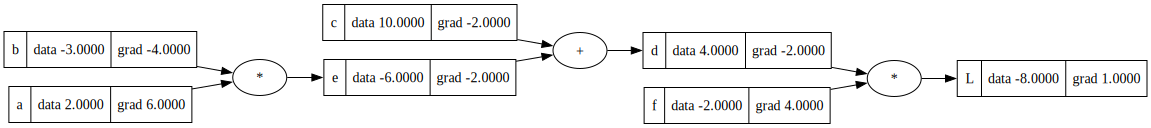

In [123]:
draw_dot(L)

In [103]:
L.grad = 1.0

In [106]:
# if,
# L = d * f

# then,
# dL/dd = ? -> f
# dL/df = ? -> d

# Intuitive meaning
# L is proportional to d with proportionality constant f
# The rate of change of L with respect to d is just that constant f
# For every unit increase in d, L increases by f

d.grad = -2.0
f.grad = 4.0

In [118]:
# WANT: dL/dc & dL/de

# WAY: dL/dc -> dL/dd * dd/dc

# d = c + e

# (f(x+h) - f(x))/h

# ((c+h -e) -(c + e))/h
# (c + h - e - c + e)/h    -> h/h  ->1.0
# # same with dd/de
# dd / dc = 1.0
# dd / de = 1.0

# #applying chain rule
# dL/dc -> dL/dd * dd/dc
# dL/de -> dL/dd * dd/de

c.grad = -2.0
e.grad = -2.0

In [122]:
# WANT: dL/da & dL/db
    
# WAY: dL/da -> dL/dd * dd/de * de/da
#      dL/db -> dL/dd * dd/de * de/db

# dL/de  ->  dL/dd * dd/de -> -2.0

# e = a * b
# de / da -> ?

# so,
#       dL/da -> dL/dd * dd/de * de/da
#     ->dL/da -> dL/de * de/da
#     ->dL/db -> dL/de * de/db

a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

In [125]:
def lol():
    
    h = 0.0001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'# same as (a.__mul__(b)).__add__(c)
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0, label='a')
    b = Value(-3.0 + h, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'# same as (a.__mul__(b)).__add__(c)
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data
    
    print((L2 - L1)/h)
    
lol()

-4.000000000008441


#### Defining Tanh

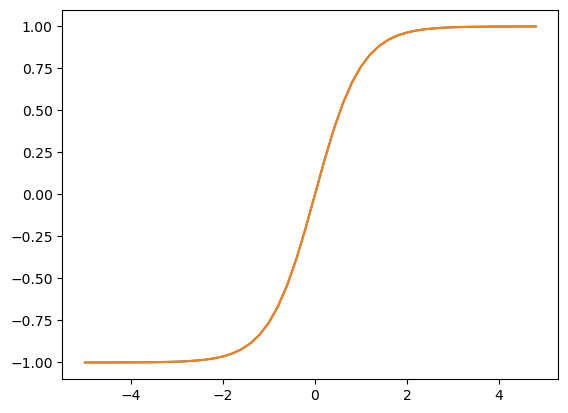

In [139]:
%matplotlib inline

#tanh function
import numpy as np
import matplotlib.pyplot as plt 
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.show();

#### Forward and Back Prop in Neural netowrk

In [230]:
# neural network

#input x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# Weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(8.0, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label= 'o'

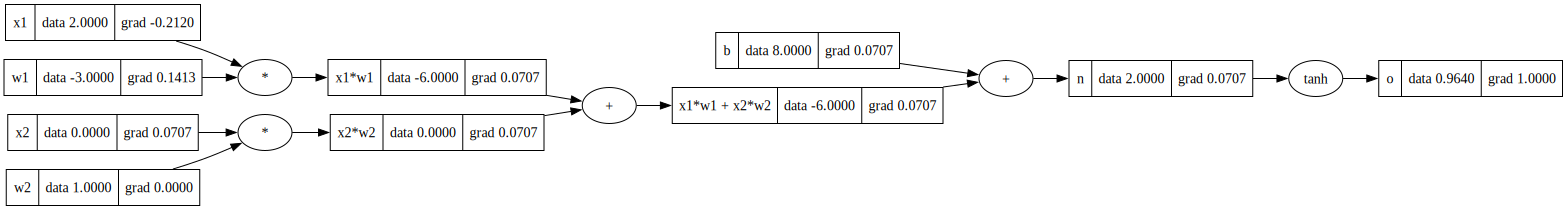

In [191]:
draw_dot(o)

#### Taking the gradient manually

In [186]:
o.grad = 1.0

In [187]:
# o = tanh(n)
# the derivative of tanh = 1 - tanh(n)**2
# do/dn = 1 - o**2
print(1 - o.data**2)
n.grad = (1 - o.data**2)

0.07065082485316443


In [188]:
# since '+' sign is just a distributer of the gradient 
x1w1x2w2.grad = n.grad
b.grad = n.grad

In [189]:
# since '+' sign is just a distributer of the gradient 
x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad

In [190]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

#### Taking the gradient using the _backward()

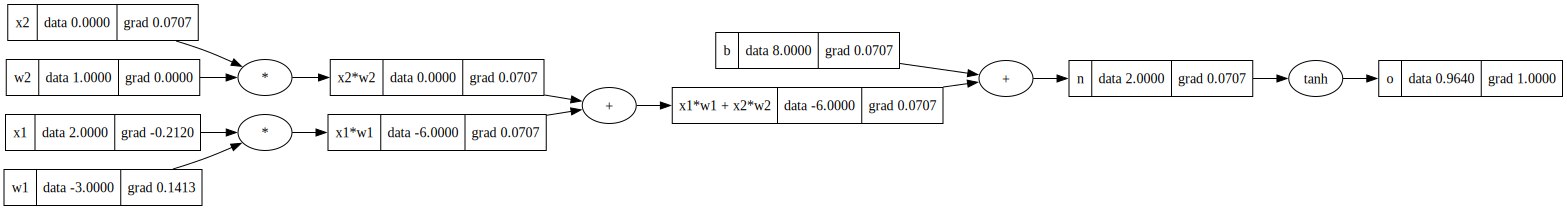

In [220]:
draw_dot(o)

In [209]:
# at the initial phase we need to set the o.grad = 1.0 because we set the self.grad = 0.0 at the begining
o.grad = 1.0

In [211]:
o._backward()

In [213]:
n._backward()

In [215]:
b._backward() #nothing happens because b is a leaf node and there is nowhere to go back to

In [217]:
x1w1x2w2._backward()

In [219]:
x1w1._backward()
x2w2._backward()

#### backpropgation with .backward() using Topological sort

We will be implementing this using the Topological sort, where this makes sures that the tree is build before the backpropagation starts

In [223]:
# implementing topological sort

topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o) #beacuse in our simple nn, the last node is 'o'
topo

[Value(data=1.0,childern=set(), op=),
 Value(data=0.0,childern=set(), op=),
 Value(data=0.0,childern={Value(data=1.0,childern=set(), op=), Value(data=0.0,childern=set(), op=)}, op=*),
 Value(data=2.0,childern=set(), op=),
 Value(data=-3.0,childern=set(), op=),
 Value(data=-6.0,childern={Value(data=2.0,childern=set(), op=), Value(data=-3.0,childern=set(), op=)}, op=*),
 Value(data=-6.0,childern={Value(data=0.0,childern={Value(data=1.0,childern=set(), op=), Value(data=0.0,childern=set(), op=)}, op=*), Value(data=-6.0,childern={Value(data=2.0,childern=set(), op=), Value(data=-3.0,childern=set(), op=)}, op=*)}, op=+),
 Value(data=8.0,childern=set(), op=),
 Value(data=2.0,childern={Value(data=-6.0,childern={Value(data=0.0,childern={Value(data=1.0,childern=set(), op=), Value(data=0.0,childern=set(), op=)}, op=*), Value(data=-6.0,childern={Value(data=2.0,childern=set(), op=), Value(data=-3.0,childern=set(), op=)}, op=*)}, op=+), Value(data=8.0,childern=set(), op=)}, op=+),
 Value(data=0.96402

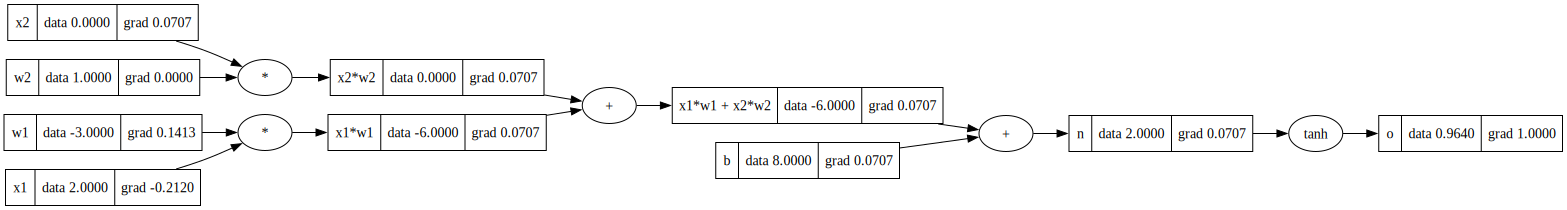

In [228]:
draw_dot(o)

In [227]:
#setting o.grad = 1.0 as the base case
o.grad = 1.0

topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o) #beacuse in our simple nn, the last node is 'o'

for node in reversed(topo):
    node._backward() # with this all the nodes will perform backpropogation, 
                     # now all we have to do is hide this entire topo in the Value class

#### Calling the .backward() from the Value class

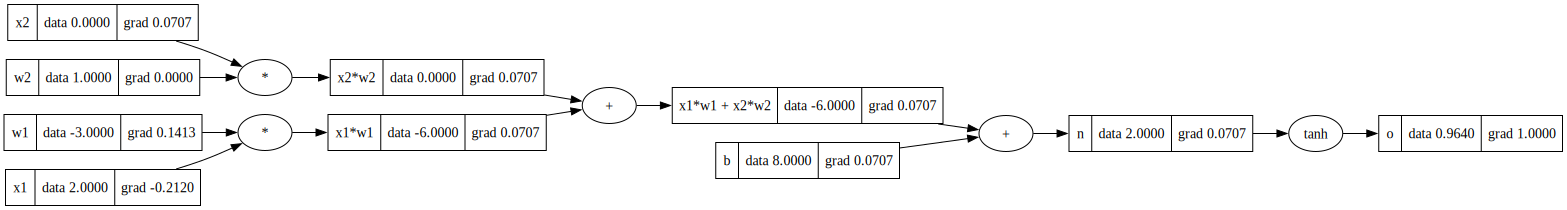

In [233]:
draw_dot(o)

In [232]:
o.backward()

#### Breaking the Tanh into smaller components and trying out backprop

We have broken the formula of tanh into much simpler form, just to show that every expression can be broken down  and increase or decrease the complexity of the formula depending upon our need!

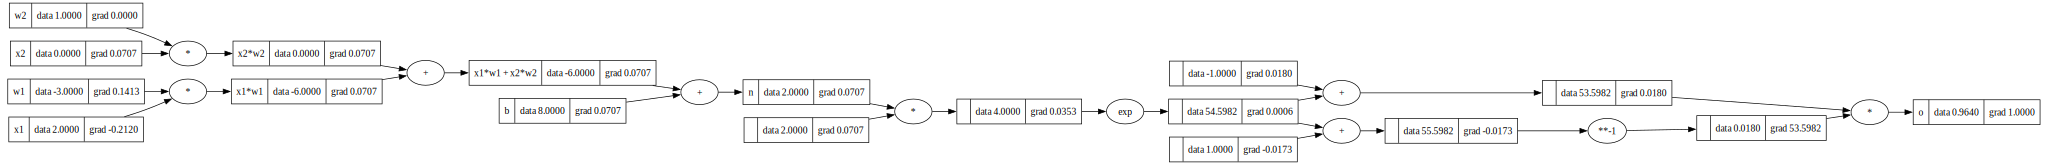

In [263]:
# neural network

#input x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# Weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(8.0, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# --tanh--
e = (2*n).exp()
o = (e - 1) / (e + 1)
# --------
o.label = 'o'
o.backward()
draw_dot(o)

#### Doing the samething but in Pytorch

In [257]:
import torch

In [267]:
x1 = torch.Tensor([2.0]).double()     ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()     ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()    ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()     ; w2.requires_grad = True
b = torch.Tensor([8.0]).double()      ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('-----')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.9640275800758169
-----
x2 0.07065082485316443
w2 0.0
x1 -0.2119524745594933
w1 0.14130164970632886


In [269]:
o

tensor([0.9640], dtype=torch.float64, grad_fn=<TanhBackward0>)

#### Building NN using Value class

In [272]:
import random

In [304]:
class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
    
    def __call__(self, x):
        # w * x + b
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b) #+ self.b
        out = act.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b]

class Layer:
    
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
        
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    
    def parameters(self):
#         params = []
#         for neuron in self.neurons:
#             ps = neurons.parameters()
#             params.extend(ps)
#         return params
        return [p for neuron in self.neurons for p in neuron.parameters()] # same as above but nested list comprehension
    
class MLP:
    
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]
    


In [305]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4,4,1])
n(x)

Value(data=0.8222732008038032)

In [306]:
n.parameters() # weights and biases inside the entire nn

[Value(data=-0.1997321900435962),
 Value(data=-0.6200532380198995),
 Value(data=0.08977510427971569),
 Value(data=0.48690372880166155),
 Value(data=-0.6548604305378292),
 Value(data=-0.005576055847329453),
 Value(data=-0.03112532243816224),
 Value(data=0.8048739081014198),
 Value(data=-0.26252865220589605),
 Value(data=0.2836932228493141),
 Value(data=0.215602082317097),
 Value(data=0.5902676722932925),
 Value(data=0.3498543860746448),
 Value(data=-0.3033237164434466),
 Value(data=0.411942690068793),
 Value(data=0.5331531133280449),
 Value(data=0.11811295375311293),
 Value(data=-0.19643304760551406),
 Value(data=-0.04190931083259053),
 Value(data=0.7568306865308394),
 Value(data=0.25878944562924633),
 Value(data=0.32341934400353645),
 Value(data=-0.5230794646360559),
 Value(data=-0.041837021840614996),
 Value(data=0.7269518135672528),
 Value(data=0.48981518112363),
 Value(data=-0.34205596521113324),
 Value(data=0.3378306307851524),
 Value(data=-0.04297665004547202),
 Value(data=0.97924

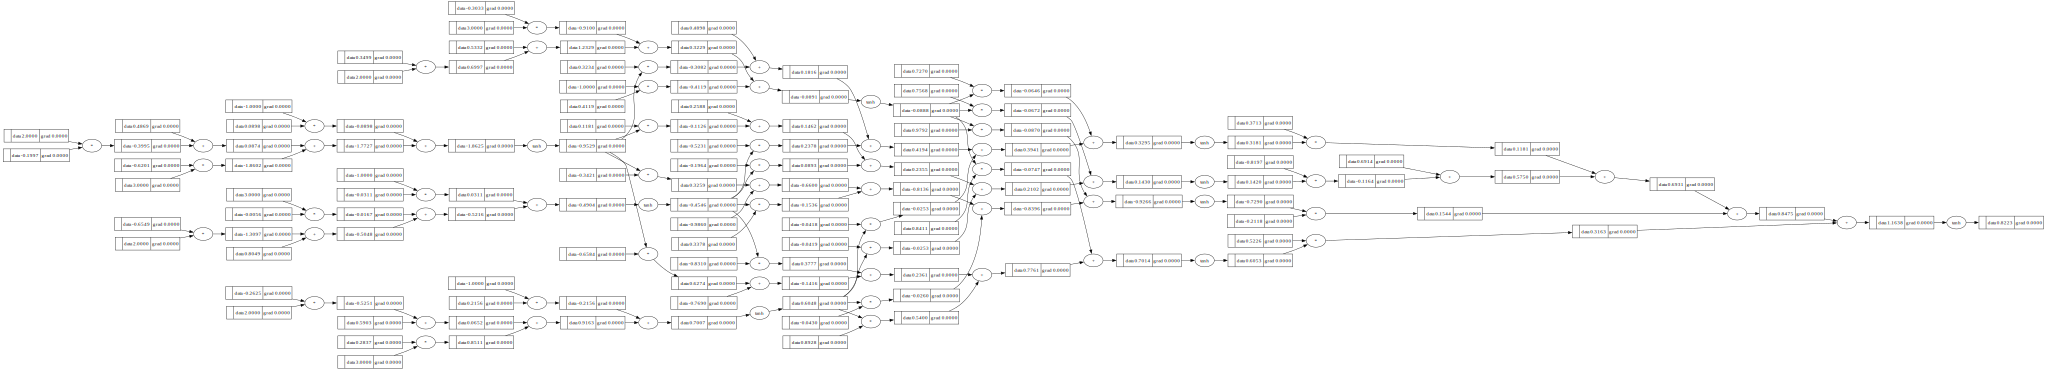

In [307]:
draw_dot(n(x))

#### Building a small dataset for validation

In [308]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
y_pred = [n(x) for x in xs]
y_pred

[Value(data=0.8222732008038032),
 Value(data=0.4530513495169756),
 Value(data=0.5327242383353693),
 Value(data=0.5544922632492565)]

In [309]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, y_pred)) # this is the MSE being applied and summing them,
loss                                                         # now we can reduce this loss

Value(data=4.690665773771137)

In [ ]:
y_pred = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, y_pred))

In [372]:
# set the p.grad = 0.0, before running the backward propogation, forgot here, but did it in the next loop section

In [310]:
loss.backward() # by applying the backpropogation on the loss, it goes all the way back to each and every weight 
                # of the neural network and changes the weight in such a way that it reduces the loss

In [311]:
n.layers[0].neurons[0].w[0].grad # every mlp has many layers, each layer has multiple neurons
                                # and each neuron has multiple weights(coming from different inputs)

-1.6716608561837738

In [313]:
n.layers[0].neurons[0].w[0].data

-0.1997321900435962

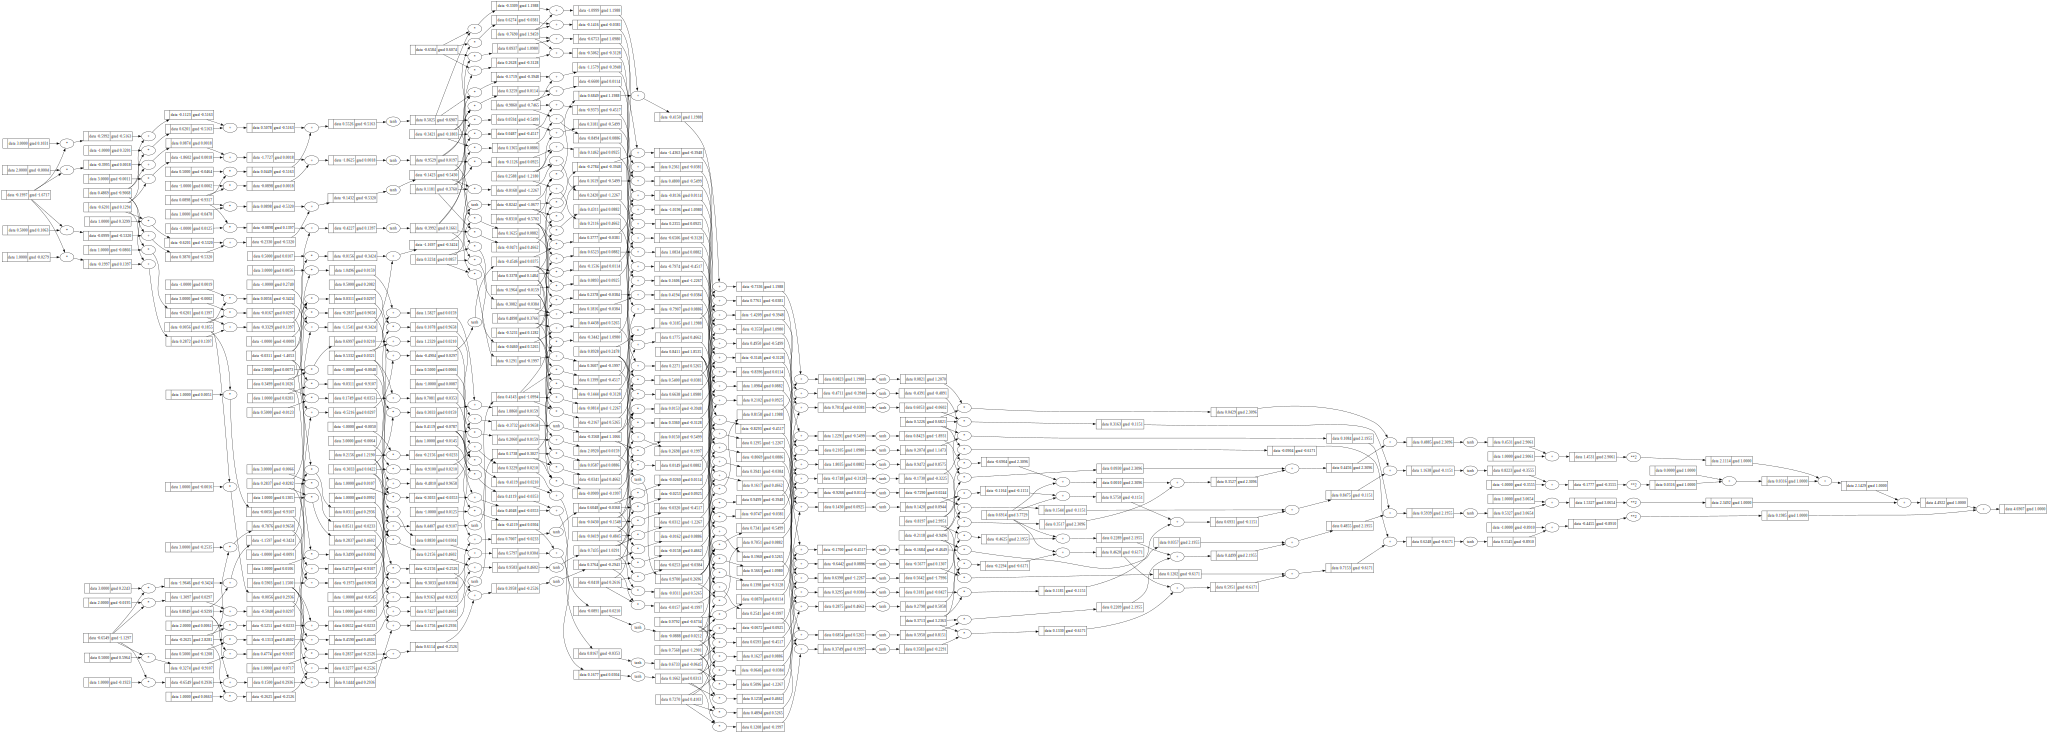

In [312]:
draw_dot(loss)

In [314]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [316]:
n.layers[0].neurons[0].w[0].data

-0.18301558148175848

In [318]:
#new loss
y_pred = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, y_pred))
loss

Value(data=4.006937755768084)

In [319]:
loss.backward()

In [320]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [321]:
#new loss
y_pred = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, y_pred))
loss

Value(data=2.8260138128529313)

In [322]:
loss.backward()

In [323]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [324]:
#new loss
y_pred = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, y_pred))
loss

Value(data=1.9641728109220493)

In [325]:
# Above we were just reducing the loss using the gradient descent

In [326]:
y_pred

[Value(data=0.6125929653323342),
 Value(data=-0.4533557979774453),
 Value(data=-0.1705961973326285),
 Value(data=0.09040775677885003)]

In [339]:
# running the same cell multiple times
loss.backward()

In [340]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [341]:
#new loss
y_pred = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, y_pred))
loss

Value(data=0.056844364281677565)

In [342]:
y_pred

[Value(data=0.9538783711485468),
 Value(data=-0.9624293969711243),
 Value(data=-0.8276507997036513),
 Value(data=0.8463726502896634)]

In [344]:
n.parameters() # these are the set of weights and biases, that gets us the desired prediction

[Value(data=0.022687992684813772),
 Value(data=-0.711573535050213),
 Value(data=0.4570489196886445),
 Value(data=0.6009416049781423),
 Value(data=-0.47935362335101334),
 Value(data=-0.052142516755177726),
 Value(data=0.3616150512294487),
 Value(data=0.9553571236547096),
 Value(data=-0.6423664998210591),
 Value(data=0.5564442323093223),
 Value(data=-0.18496329059335098),
 Value(data=0.46378491506147645),
 Value(data=0.058957749108642835),
 Value(data=-0.6090591629486681),
 Value(data=0.7116178000346657),
 Value(data=0.30708520432780684),
 Value(data=0.3968450443727267),
 Value(data=-0.17111504018008172),
 Value(data=-0.04738788731611136),
 Value(data=1.1069156923108632),
 Value(data=0.20584531830698144),
 Value(data=0.28644131693613023),
 Value(data=-0.5553406314909646),
 Value(data=-0.0863348885418464),
 Value(data=0.6434579010673985),
 Value(data=0.44020236233061216),
 Value(data=-0.2792177122177822),
 Value(data=0.3174524227773379),
 Value(data=-0.022866868057263526),
 Value(data=1.1

#### Initializing the nn from start to see if the loop is working or not?

In [366]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4,4,1])
n(x)

Value(data=0.8701225552621584)

In [367]:
# runnig the data once again to check if the loop is working ?
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
y_pred = [n(x) for x in xs]
y_pred


[Value(data=0.8701225552621584),
 Value(data=0.8534237963531693),
 Value(data=0.7085903418321045),
 Value(data=0.8645585576371345)]

In [370]:
# insted of running the cell over and over again we can run it in a loop
# set the p.grad = 0.0

for k in range(20):
    # forward pass
    y_pred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, y_pred))
    
    # backward pass
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()
    
    # update (gradient descent)
    for p in n.parameters():
        p.data += -0.05 * p.grad
    
    print(k, loss.data)

0 0.06110768985436474
1 0.05722364807872275
2 0.053763197292727494
3 0.05066281515216213
4 0.047870863160003586
5 0.04534496123404988
6 0.043050023640912136
7 0.040956770860675916
8 0.03904058880988316
9 0.03728064489471357
10 0.035659196244213584
11 0.0341610433463702
12 0.032773094829365954
13 0.03148401801544634
14 0.0302839562577324
15 0.029164298707968366
16 0.02811749156868478
17 0.0271368824088739
18 0.02621659101286864
19 0.025351401659780295


In [371]:
y_pred

[Value(data=0.926448839145288),
 Value(data=-0.9139739773978811),
 Value(data=-0.9220363436192662),
 Value(data=0.9196083330455751)]

#### Rough

In [67]:
#rough

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
#     def __repr__(self):
#         return f"Value of x = {self.x} and value of y = {self.y}"

p = Point(1, 2)
print(p)
# Output: <__main__.Point object at 0x...>

In [27]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __repr__(self):
        return f"{self.x*self.y}"
    
    def __str__(self):
        return "{self.x}"
    
p = Point(2, 2)
print(repr(p))
# Output: <__main__.Point object at 0x...>


4


In [25]:
class Fruit:
    def __init__(self, name, color):
        self.name = name
        self.color = color

    def __str__(self):
        """Returns a user-friendly, readable string representation."""
        return f"A {self.color} {self.name}"

    def __repr__(self):
        """Returns a developer-friendly, unambiguous string representation."""
        return f"Fruit(name='{self.name}', color='{self.color}')"

# Create an instance of the class
apple = Fruit("apple", "red")

# Using str() or print() calls __str__
print(str(apple))
# Output: A red apple
print(apple)
# Output: A red apple

# Using repr() calls __repr__
print(repr(apple))
# Output: Fruit(name='apple', color='red')

# The interactive console also uses __repr__
# >>> apple
# Fruit(name='apple', color='red')


A red apple
A red apple
Fruit(name='apple', color='red')


In [49]:
class Value:
    
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Value(data={self.data})"
    
#     def __add__(self, other):
#         out = Value(self.data + other.data, (self, other), '+')
#         return out


a = Value(2.0)
b = Value(-3.0)
a + b

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'

In [66]:
class Point:
    def __init__(self, data, x):
        self.data = data
        self.x = x
#         self.data = data
    
    def __repr__(self):
        return f"{self.data + self.x}"
    
#     def __add__(self, other):
#         out = Point(self.data + other.data)
#         return out
        

x = Point(2,5)
# y = Point(4)

# z = x + y
print(repr(x))

7


In [ ]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __repr__(self):
        return f"{self.x*self.y}"
    
    def __str__(self):
        return "{self.x}"
    
p = Point(2, 2)
print(repr(p))
# Output: <__main__.Point object at 0x...>
